In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import shap
import sklearn
import numpy as np

# Define a more realistic dataset for credit score prediction
# Features: Payment history (%), Credit utilization (%), Credit history length (years), Types of credit, New credit inquiries
# Labels: Ground truth credit scores (synthetic for demonstration purposes)
data = [
    [95, 30, 10, 3, 2, 750],
    [85, 45, 8, 2, 5, 700],
    [65, 70, 5, 1, 10, 600],
    [90, 40, 15, 4, 3, 720],
    [80, 50, 7, 2, 7, 680],
    [99, 20, 20, 5, 1, 800],
    [70, 60, 4, 1, 9, 640],
    [88, 35, 12, 3, 2, 730],
    [55, 85, 3, 1, 12, 580],
    [92, 25, 18, 4, 4, 760]
]

# Split features and labels
features = np.array([d[:-1] for d in data], dtype=np.float32)
labels = np.array([d[-1] for d in data], dtype=np.float32).reshape(-1, 1)

# Convert to PyTorch tensors
X = torch.tensor(features)
y = torch.tensor(labels)

# Define a simpler linear regression model without a hidden layer
class SimpleCreditScoreModel(nn.Module):
    def __init__(self):
        super(SimpleCreditScoreModel, self).__init__()
        self.linear = nn.Linear(5, 1)  # Direct mapping from 5 features to 1 output

    def forward(self, x):
        return self.linear(x)

# Initialize the linear model, loss function, and optimizer
model = SimpleCreditScoreModel()
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.0001)

# Training loop for the simpler linear model
epochs = 2000
for epoch in range(epochs):
    # Forward pass
    outputs = model(X)
    loss = criterion(outputs, y)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print loss occasionally
    if (epoch + 1) % 200 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

# Get the weights and biases of the linear layer to estimate feature importance
weights = model.linear.weight.data
bias = model.linear.bias.data

# Feature names for clarity
feature_names = [
    "Payment History", 
    "Credit Utilization", 
    "Credit History Length", 
    "Types of Credit", 
    "New Credit Inquiries"
]

# Print the equation for interpretability
print("\nEquation for Feature Influence on Credit Score:")

# Construct the equation string for a linear relationship
equation_terms = []
for i, (weight, feature_name) in enumerate(zip(weights[0], feature_names)):
    equation_terms.append(f"({weight.item():.4f}) * {feature_name}")

equation = " + ".join(equation_terms) + f" + Bias({bias.item():.4f})"
print("Credit Score Estimate = " + equation)

# Compute percentage contribution of each feature
absolute_weights = torch.abs(weights[0])  # Take absolute values to consider magnitude only
total_weight = torch.sum(absolute_weights)
percent_contributions = (absolute_weights / total_weight) * 100  # Calculate percentage contributions

# Print the percentage contribution of each feature
print("\nPercentage Contribution of Each Feature to the Credit Score Estimate:")
for i, (feature_name, contribution) in enumerate(zip(feature_names, percent_contributions)):
    print(f"{feature_name}: {contribution.item():.2f}%")


Epoch [200/2000], Loss: 231.5391
Epoch [400/2000], Loss: 218.3491
Epoch [600/2000], Loss: 210.0322
Epoch [800/2000], Loss: 204.4387
Epoch [1000/2000], Loss: 200.4020
Epoch [1200/2000], Loss: 197.2879
Epoch [1400/2000], Loss: 194.7487
Epoch [1600/2000], Loss: 192.5887
Epoch [1800/2000], Loss: 190.6995
Epoch [2000/2000], Loss: 189.0159

Equation for Feature Influence on Credit Score:
Credit Score Estimate = (7.0075) * Payment History + (1.6687) * Credit Utilization + (2.9326) * Credit History Length + (0.2103) * Types of Credit + (2.6471) * New Credit Inquiries + Bias(0.1004)

Percentage Contribution of Each Feature to the Credit Score Estimate:
Payment History: 48.44%
Credit Utilization: 11.54%
Credit History Length: 20.27%
Types of Credit: 1.45%
New Credit Inquiries: 18.30%


SHAP values for the 0 instance: .values =
array([ 9.17978837e+01, -2.66996640e+01, -5.86515198e-01,  8.41401164e-02,
       -9.26486323e+00])

.base_values =
array([695.79273682])

.data =
array([95., 30., 10.,  3.,  2.], dtype=float32)
Feature values for the 0 instance: [95. 30. 10.  3.  2.]
Expected value: [695.79273682]


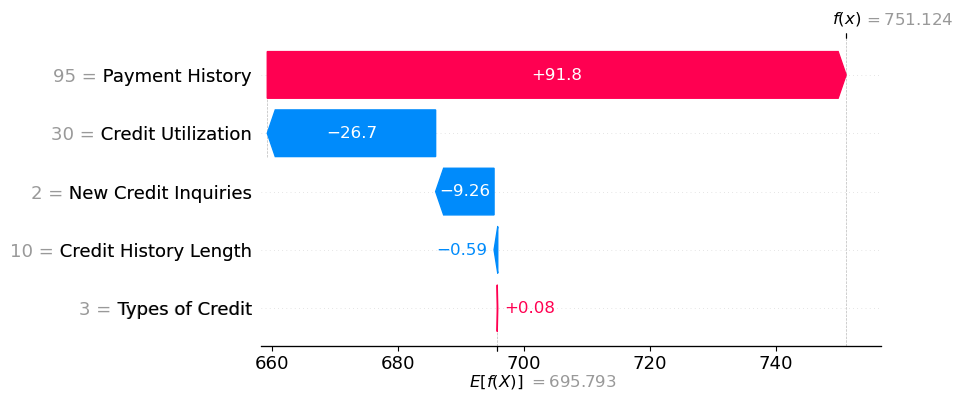

SHAP values for the 1 instance: .values =
array([21.72317429, -1.66871974, -6.45180308, -0.12619349, -1.32357712])

.base_values =
array([695.79273682])

.data =
array([85., 45.,  8.,  2.,  5.], dtype=float32)
Feature values for the 1 instance: [85. 45.  8.  2.  5.]
Expected value: [695.79273682]


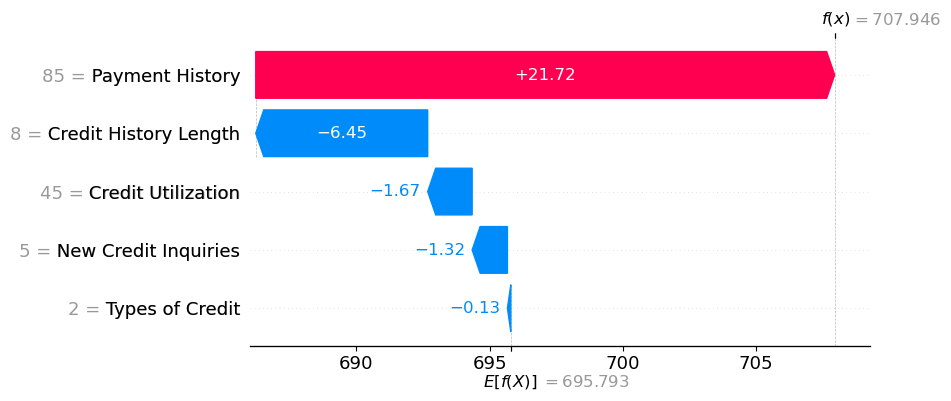

SHAP values for the 2 instance: .values =
array([-118.42629756,   40.04947962,  -15.24972082,   -0.3365151 ,
         11.91201625])

.base_values =
array([695.79273682])

.data =
array([65., 70.,  5.,  1., 10.], dtype=float32)
Feature values for the 2 instance: [65. 70.  5.  1. 10.]
Expected value: [695.79273682]


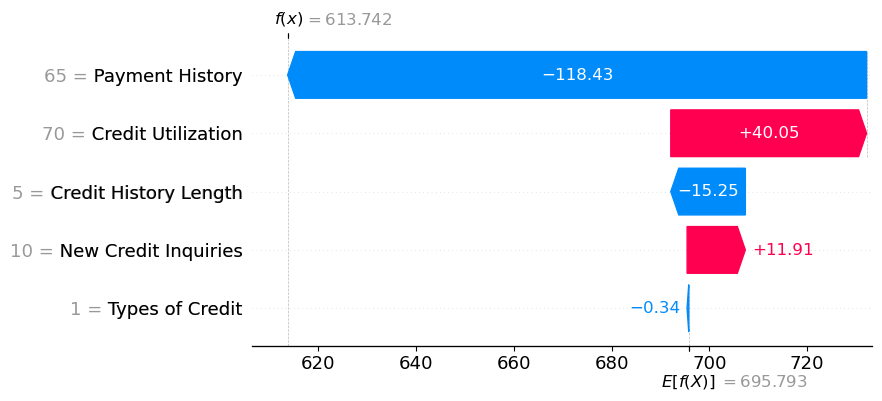

SHAP values for the 3 instance: .values =
array([ 56.7605306 , -10.01234919,  14.07665583,   0.294443  ,
        -6.61776657])

.base_values =
array([695.79273682])

.data =
array([90., 40., 15.,  4.,  3.], dtype=float32)
Feature values for the 3 instance: [90. 40. 15.  4.  3.]
Expected value: [695.79273682]


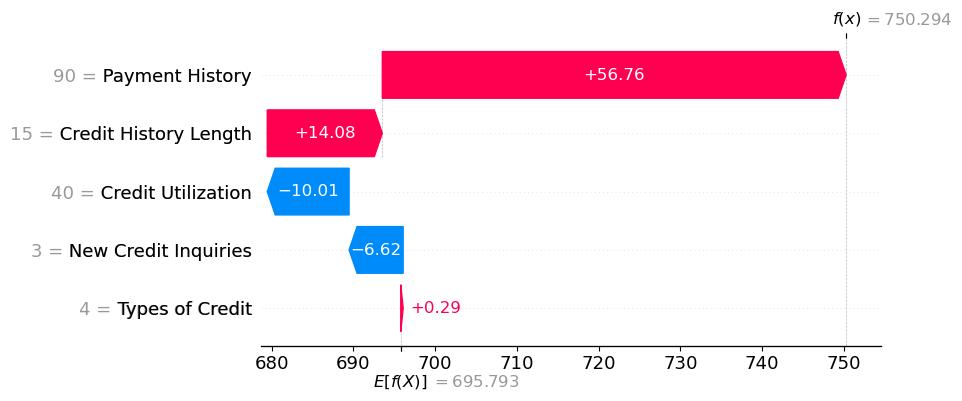

SHAP values for the 4 instance: .values =
array([-13.31417765,   6.67490723,  -9.38442963,  -0.12618429,
         3.97067291])

.base_values =
array([695.79273682])

.data =
array([80., 50.,  7.,  2.,  7.], dtype=float32)
Feature values for the 4 instance: [80. 50.  7.  2.  7.]
Expected value: [695.79273682]


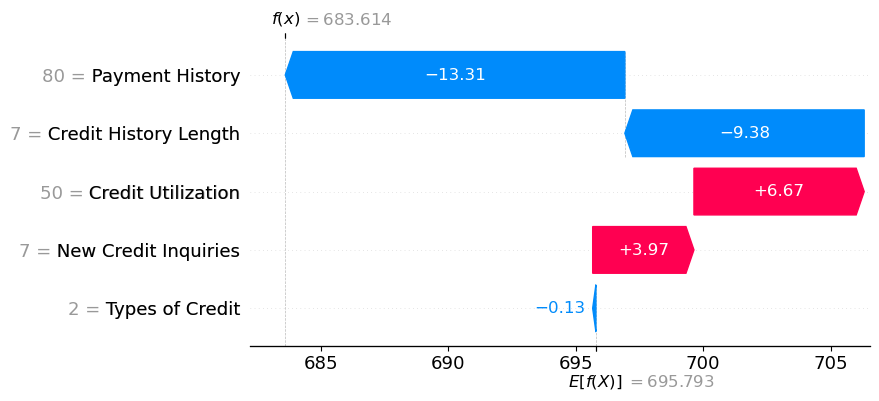

SHAP values for the 5 instance: .values =
array([119.8277857 , -43.38691895,  28.73982488,   0.50474976,
       -11.91201609])

.base_values =
array([695.79273682])

.data =
array([99., 20., 20.,  5.,  1.], dtype=float32)
Feature values for the 5 instance: [99. 20. 20.  5.  1.]
Expected value: [695.79273682]


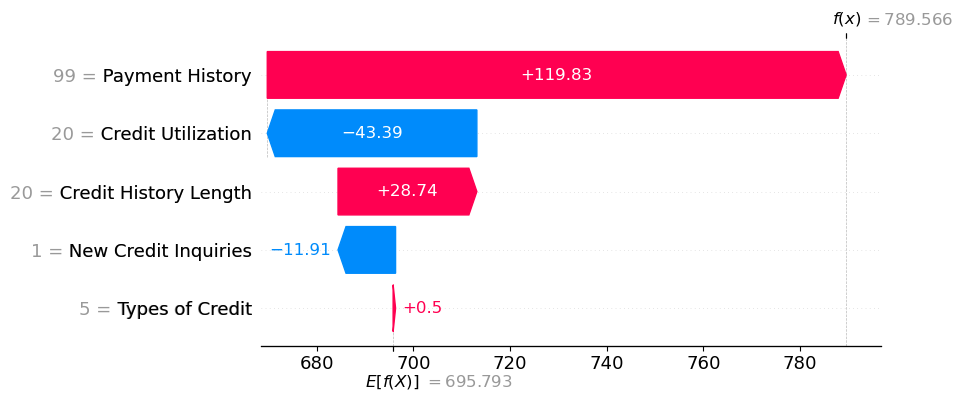

SHAP values for the 6 instance: .values =
array([-83.38892985,  23.36220744, -18.18234009,  -0.33651235,
         9.26486196])

.base_values =
array([695.79273682])

.data =
array([70., 60.,  4.,  1.,  9.], dtype=float32)
Feature values for the 6 instance: [70. 60.  4.  1.  9.]
Expected value: [695.79273682]


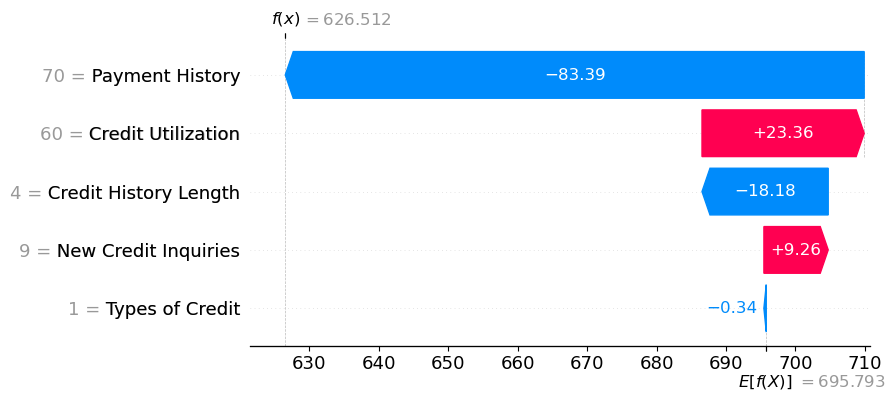

SHAP values for the 7 instance: .values =
array([ 42.74557454, -18.35603551,   5.278738  ,   0.08412231,
        -9.26486272])

.base_values =
array([695.79273682])

.data =
array([88., 35., 12.,  3.,  2.], dtype=float32)
Feature values for the 7 instance: [88. 35. 12.  3.  2.]
Expected value: [695.79273682]


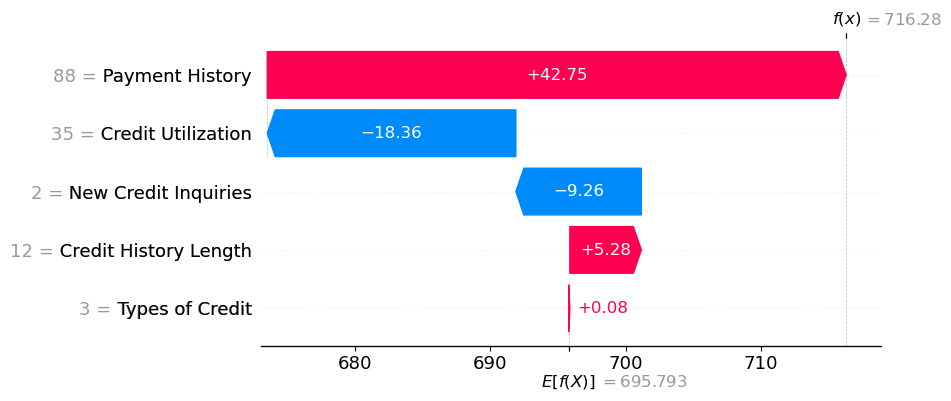

SHAP values for the 8 instance: .values =
array([-188.50102626,   65.080386  ,  -21.11497279,   -0.33649963,
         17.20620692])

.base_values =
array([695.79273682])

.data =
array([55., 85.,  3.,  1., 12.], dtype=float32)
Feature values for the 8 instance: [55. 85.  3.  1. 12.]
Expected value: [695.79273682]


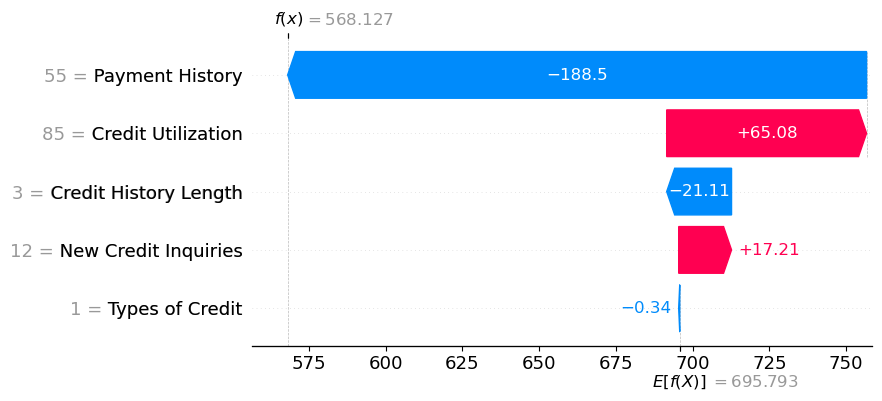

SHAP values for the 9 instance: .values =
array([ 70.77548248, -35.04329295,  22.87456289,   0.29444967,
        -3.9706723 ])

.base_values =
array([695.79273682])

.data =
array([92., 25., 18.,  4.,  4.], dtype=float32)
Feature values for the 9 instance: [92. 25. 18.  4.  4.]
Expected value: [695.79273682]


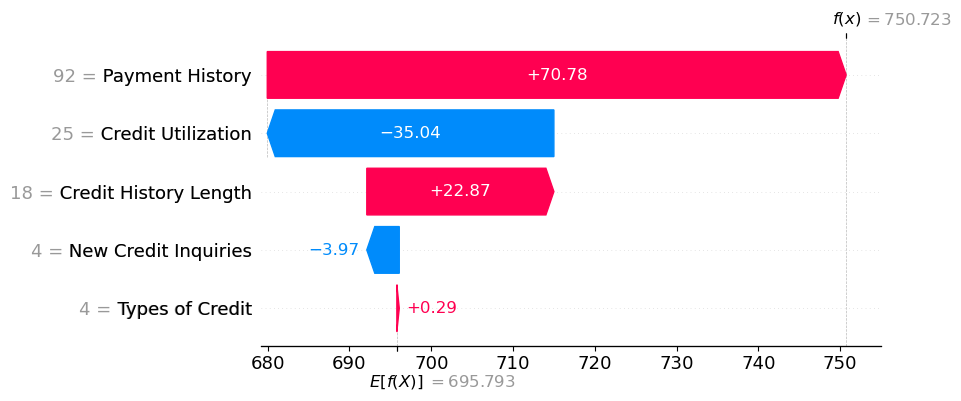

In [11]:
# Define a prediction function for your PyTorch model
def model_predict(data):
    data_tensor = torch.tensor(data, dtype=torch.float32)  # Convert input data to tensor
    return model(data_tensor).detach().numpy()  # Get predictions as NumPy array

# Create a SHAP explainer using Explainer
explainer = shap.Explainer(model_predict, X.numpy())  # Use the input features for background data

# Calculate SHAP values for the dataset
shap_values = explainer(X.numpy())  # Calculate SHAP values

# Selecting each SHAP value
for instance_index in range(len(data)):
    expected_value = shap_values.base_values[instance_index]  # Get expected value for specified instance
    first_instance_shap_values = shap_values[instance_index]  # Get SHAP values for the specified instance
    first_instance_features = X.numpy()[instance_index]       # Get features for the specified instance
    
    # Print to debug
    print(f"SHAP values for the {instance_index} instance:", first_instance_shap_values)  # Debugging output
    print(f"Feature values for the {instance_index} instance:", first_instance_features)   # Debugging output
    print("Expected value:", expected_value)  # Debugging output
    
    
    # Create the Explanation object for the waterfall plot
    explanation = shap.Explanation(
        values=first_instance_shap_values,
        base_values=expected_value,
        data=first_instance_features,
        feature_names=feature_names
    )
    
    # Create the waterfall plot for the first instance
    shap.waterfall_plot(explanation)  # Pass the Explanation object to the waterfall plot